# Shopkit

### Import Libraries

In [33]:
# import libraries 
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

### Load Auth Tokens

In [34]:
# define function for getting auth tokens
def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [35]:
# load auth token
auth_path = '/Users/akg/.secret/shopkit/api_keys.json'
auth_key = get_keys(auth_path)['auth-token']

### Define Endpoint

In [36]:
# define endpoint
endpoint_url = 'https://shopkit-caa72.uc.r.appspot.com/api/store/products/'

# define headers
headers = {
    "accept": "application/json",
    "Authorization": f"Token {auth_key}"
}

In [37]:
# brand-specific slugs
# halfdays
halfdays = 'halfdays.myshopify.com'

In [38]:
# create brand-specific endpoint 
halfday_endpoint = endpoint_url + halfdays

### Request Endpoint

In [39]:
# request endpoint
json_data = requests.get(url=halfday_endpoint, headers=headers).json()

### Examine Data

In [40]:
# preview data 
json_data['46 products'][0].keys()

dict_keys(['id', 'title', 'body_html', 'vendor', 'product_type', 'created_at', 'handle', 'updated_at', 'published_at', 'template_suffix', 'status', 'published_scope', 'tags', 'admin_graphql_api_id', 'variants', 'options', 'images', 'image'])

In [41]:
# save data as dataframe 
halfdays_df = pd.json_normalize(json_data['46 products'])

In [42]:
halfdays_df.columns

Index(['id', 'title', 'body_html', 'vendor', 'product_type', 'created_at',
       'handle', 'updated_at', 'published_at', 'template_suffix', 'status',
       'published_scope', 'tags', 'admin_graphql_api_id', 'variants',
       'options', 'images', 'image.id', 'image.position', 'image.created_at',
       'image.updated_at', 'image.alt', 'image.width', 'image.height',
       'image.src', 'image.variant_ids', 'image.admin_graphql_api_id',
       'image'],
      dtype='object')

In [43]:
# explode variants
halfdays_df = halfdays_df.explode('variants')

In [44]:
halfdays_df.head()

,id,title,body_html,vendor,product_type,created_at,handle,updated_at,published_at,template_suffix,...,image.position,image.created_at,image.updated_at,image.alt,image.width,image.height,image.src,image.variant_ids,image.admin_graphql_api_id,image
0,6044920250527,100% Mineral Sunscreen Stick,SKU 3133,Halfdays,,2020-12-31T11:21:43-07:00,100-mineral-sunscreen-stick,2022-10-25T11:57:47-06:00,None,,...,1.0,2020-12-31T11:21:46-07:00,2020-12-31T11:21:46-07:00,None,660.0,834.0,https://cdn.shopify.com/s/files/1/0427/2413/09...,[],gid://shopify/ProductImage/21032395178143,NaN
1,7847011975393,A Test Product,,Halfdays,,2022-09-23T01:52:16-06:00,test-product,2022-10-25T11:57:48-06:00,None,,...,1.0,2022-09-23T01:52:19-06:00,2022-10-06T02:05:06-06:00,Black,1806.0,2691.0,https://cdn.shopify.com/s/files/1/0427/2413/09...,"[43336439300321, 43336439365857, 4333643943139...",gid://shopify/ProductImage/38334953488609,NaN
1,7847011975393,A Test Product,,Halfdays,,2022-09-23T01:52:16-06:00,test-product,2022-10-25T11:57:48-06:00,None,,...,1.0,2022-09-23T01:52:19-06:00,2022-10-06T02:05:06-06:00,Black,1806.0,2691.0,https://cdn.shopify.com/s/files/1/0427/2413/09...,"[43336439300321, 43336439365857, 4333643943139...",gid://shopify/ProductImage/38334953488609,NaN
1,7847011975393,A Test Product,,Halfdays,,2022-09-23T01:52:16-06:00,test-product,2022-10-25T11:57:48-06:00,None,,...,1.0,2022-09-23T01:52:19-06:00,2022-10-06T02:05:06-06:00,Black,1806.0,2691.0,https://cdn.shopify.com/s/files/1/0427/2413/09...,"[43336439300321, 43336439365857, 4333643943139...",gid://shopify/ProductImage/38334953488609,NaN
1,7847011975393,A Test Product,,Halfdays,,2022-09-23T01:52:16-06:00,test-product,2022-10-25T11:57:48-06:00,None,,...,1.0,2022-09-23T01:52:19-06:00,2022-10-06T02:05:06-06:00,Black,1806.0,2691.0,https://cdn.shopify.com/s/files/1/0427/2413/09...,"[43336439300321, 43336439365857, 4333643943139...",gid://shopify/ProductImage/38334953488609,NaN


In [45]:
halfdays_df.iloc[0]['variants'].keys()

dict_keys(['id', 'title', 'price', 'sku', 'position', 'inventory_policy', 'compare_at_price', 'fulfillment_service', 'inventory_management', 'option1', 'option2', 'option3', 'created_at', 'updated_at', 'taxable', 'barcode', 'grams', 'image_id', 'weight', 'weight_unit', 'inventory_item_id', 'inventory_quantity', 'old_inventory_quantity', 'requires_shipping', 'admin_graphql_api_id'])

In [46]:
halfdays_df.iloc[4]['variants']['option1']

'Black'

In [47]:
halfdays_df.iloc[4]['variants']['option2']

'M'

In [48]:
halfdays_df.iloc[4]['variants']['option3']

'Short'

In [49]:
# pull out data from variants
halfdays_df['variant_id'] = halfdays_df['variants'].apply(lambda x: x['id'])
halfdays_df['variant_title'] = halfdays_df['variants'].apply(lambda x: x['title'])
halfdays_df['price'] = halfdays_df['variants'].apply(lambda x: x['price'])
halfdays_df['sku'] = halfdays_df['variants'].apply(lambda x: x['sku'])
halfdays_df['position'] = halfdays_df['variants'].apply(lambda x: x['position'])
halfdays_df['inv_policy'] = halfdays_df['variants'].apply(lambda x: x['inventory_policy'])
halfdays_df['compare_at_price'] = halfdays_df['variants'].apply(lambda x: x['compare_at_price'])
halfdays_df['fulfillment_service'] = halfdays_df['variants'].apply(lambda x: x['fulfillment_service'])
halfdays_df['inv_management'] = halfdays_df['variants'].apply(lambda x: x['inventory_management'])
halfdays_df['option_1'] = halfdays_df['variants'].apply(lambda x: x['option1'])
halfdays_df['option_2'] = halfdays_df['variants'].apply(lambda x: x['option2'])
halfdays_df['option_3'] = halfdays_df['variants'].apply(lambda x: x['option3'])
halfdays_df['taxable'] = halfdays_df['variants'].apply(lambda x: x['taxable'])
halfdays_df['barcode'] = halfdays_df['variants'].apply(lambda x: x['barcode'])
halfdays_df['grams'] = halfdays_df['variants'].apply(lambda x: x['grams'])
halfdays_df['weight'] = halfdays_df['variants'].apply(lambda x: x['weight'])
halfdays_df['weight_unit'] = halfdays_df['variants'].apply(lambda x: x['weight_unit'])
halfdays_df['inventory_item_id'] = halfdays_df['variants'].apply(lambda x: x['inventory_item_id'])
halfdays_df['inventory_quantity'] = halfdays_df['variants'].apply(lambda x: x['inventory_quantity'])
halfdays_df['old_inventory_quantity'] = halfdays_df['variants'].apply(lambda x: x['old_inventory_quantity'])
halfdays_df['requires_shipping'] = halfdays_df['variants'].apply(lambda x: x['requires_shipping'])

In [50]:
halfdays_df.columns

Index(['id', 'title', 'body_html', 'vendor', 'product_type', 'created_at',
       'handle', 'updated_at', 'published_at', 'template_suffix', 'status',
       'published_scope', 'tags', 'admin_graphql_api_id', 'variants',
       'options', 'images', 'image.id', 'image.position', 'image.created_at',
       'image.updated_at', 'image.alt', 'image.width', 'image.height',
       'image.src', 'image.variant_ids', 'image.admin_graphql_api_id', 'image',
       'variant_id', 'variant_title', 'price', 'sku', 'position', 'inv_policy',
       'compare_at_price', 'fulfillment_service', 'inv_management', 'option_1',
       'option_2', 'option_3', 'taxable', 'barcode', 'grams', 'weight',
       'weight_unit', 'inventory_item_id', 'inventory_quantity',
       'old_inventory_quantity', 'requires_shipping'],
      dtype='object')

In [51]:
halfdays_df['price'].value_counts()

245.00    168
325.00    112
395.00     96
95.00      74
275.00     70
         ... 
41.25       1
42.00       1
42.75       1
43.50       1
34.00       1
Name: price, Length: 207, dtype: int64

In [54]:
# convert price to float 
halfdays_df['price'] = halfdays_df['price'].astype('float')

<AxesSubplot: xlabel='price', ylabel='Count'>

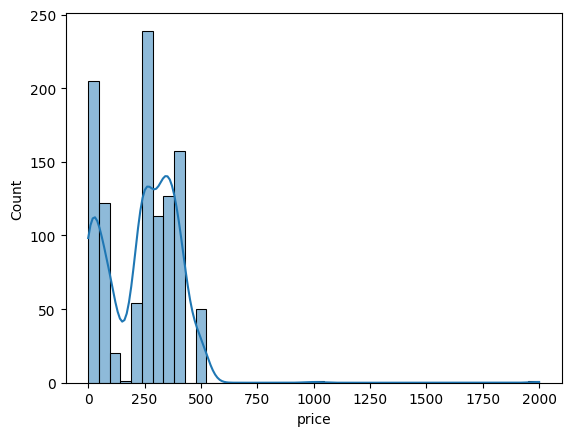

In [56]:
sns.histplot(halfdays_df['price'], bins='auto', kde=True)

<AxesSubplot: xlabel='grams', ylabel='price'>

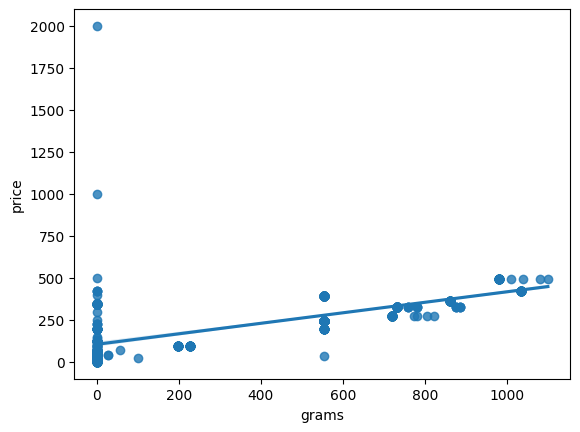

In [58]:
sns.regplot(x=halfdays_df['grams'], y=halfdays_df['price'])

In [59]:
halfdays_df.loc[halfdays_df['price'] > 800]

,id,title,body_html,vendor,product_type,created_at,handle,updated_at,published_at,template_suffix,...,option_3,taxable,barcode,grams,weight,weight_unit,inventory_item_id,inventory_quantity,old_inventory_quantity,requires_shipping
16,5750283206815,Gift Card,"<meta charset=""utf-8""><span data-mce-fragment=...",Halfdays,Gift Cards,2020-10-09T11:19:42-06:00,gift-card,2022-11-10T09:20:16-07:00,2020-10-09T17:12:10-06:00,,...,None,False,,0,0.0,lb,44631179559137,-4,-4,False
16,5750283206815,Gift Card,"<meta charset=""utf-8""><span data-mce-fragment=...",Halfdays,Gift Cards,2020-10-09T11:19:42-06:00,gift-card,2022-11-10T09:20:16-07:00,2020-10-09T17:12:10-06:00,,...,None,False,,0,0.0,lb,45514732536033,-1,-1,False
